# WeatherPy


## Setup

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed.


In [15]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}


# the header of the print log
print("Beginning Data Retrieval from OpenWeather:")
print("------------------------------------------")

# created a city dictionary to build dataframe
city_dict = {}

# created a city list of the cities found with the request
city_list = []

# row count will allow the city numbering while requesting
row_count = 1


for city in cities: 
    try:
        current_city = owm.get_current(city, **settings)
        city_dict[city] = current_city
        city_list.append(city)
        print(f'Processing | {city} #{row_count}')
        row_count += 1
    except:
        print("----------------------------------------------")
        print(f'{city} does not exist, searching next city...')
        print("----------------------------------------------")
        
# the footer of the print log     
print("-------------------")
print(f'Processing Complete')

Beginning Data Retrieval from OpenWeather:
------------------------------------------
Processing | isangel #1
Processing | puerto ayora #2
Processing | hilo #3
Processing | rikitea #4
Processing | kapaa #5
Processing | saint-philippe #6
Processing | ushuaia #7
Processing | kloulklubed #8
Processing | tuktoyaktuk #9
Processing | harper #10
Processing | sarkand #11
Processing | bethel #12
Processing | bandarbeyla #13
Processing | vaini #14
Processing | avarua #15
----------------------------------------------
umzimvubu does not exist, searching next city...
----------------------------------------------
Processing | hermanus #16
Processing | lata #17
Processing | petropavlovka #18
----------------------------------------------
nizhneyansk does not exist, searching next city...
----------------------------------------------
Processing | margate #19
Processing | butaritari #20
Processing | smoky lake #21
Processing | lucapa #22
----------------------------------------------
warqla does not

Processing | tongren #205
----------------------------------------------
tabiauea does not exist, searching next city...
----------------------------------------------
Processing | sioux lookout #206
Processing | deputatskiy #207
Processing | hofn #208
Processing | clyde river #209
Processing | saint john #210
Processing | bathsheba #211
Processing | mildura #212
Processing | nome #213
Processing | arua #214
Processing | chato #215
Processing | moses lake #216
Processing | alice springs #217
----------------------------------------------
amderma does not exist, searching next city...
----------------------------------------------
Processing | devrek #218
Processing | marzuq #219
Processing | necochea #220
Processing | luderitz #221
----------------------------------------------
mys shmidta does not exist, searching next city...
----------------------------------------------
Processing | vilhena #222
Processing | chhabra #223
Processing | narsaq #224
Processing | cerrito #225
Processing

----------------------------------------------
gollere does not exist, searching next city...
----------------------------------------------
Processing | flinders #378
Processing | belaya gora #379
Processing | la ronge #380
Processing | pangkalanbuun #381
Processing | humaita #382
Processing | mitsamiouli #383
Processing | haimen #384
Processing | tilichiki #385
Processing | plettenberg bay #386
Processing | mackenzie #387
Processing | manikpur #388
Processing | cap malheureux #389
Processing | vigrestad #390
Processing | kholtoson #391
Processing | port hedland #392
Processing | kahului #393
Processing | allahganj #394
Processing | karwar #395
Processing | jhelum #396
Processing | touros #397
Processing | makasar #398
Processing | douentza #399
Processing | egvekinot #400
Processing | barcelos #401
----------------------------------------------
halalo does not exist, searching next city...
----------------------------------------------
Processing | gewane #402
Processing | huai yot #

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
# wrote the city_dict created to a csv file, labeled 'cities.csv'
import csv

with open('cities.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in city_dict.items():
       writer.writerow([key, value])

In [ ]:
# how to find the city name
current_weather["austin"]["name"]

# how to find the city cloudiness
current_weather["port washington"]["clouds"]["all"]

# how to find the city country
current_weather["austin"]['sys']['country']

# how to find the city date
current_weather["austin"]['dt']

# how to find the city humidity
current_weather["austin"]['main']['humidity']

# how to find the city latitude 
current_weather["austin"]["coord"]['lat']

# how to find the city longitude 
current_weather["austin"]["coord"]['lon']

# how to find the city max temp
current_weather["austin"]["main"]["temp_max"]

# how to find the city wind speed 
current_weather["austin"]["wind"]["speed"]

In [25]:
# stores the cloud data
cloud_list = []

# stores the country data
country_list = []

# stores the date data
date_list = []

# stores the humidity data
humidity_list = []

# stores the latitude data
lat_list = []

# stores the longitude data
lng_list = []

# stores the max temp data
max_temp_list = []

# stores the city wind speed data
wind_speed_list = []


for city in city_list:
    cloud_list.append(current_weather[city]["clouds"]["all"])
    country_list.append(current_weather[city]['sys']['country'])
    date_list.append(current_weather[city]['dt'])
    humidity_list.append(current_weather[city]['main']['humidity'])
    lat_list.append(current_weather[city]["coord"]['lat'])
    lng_list.append(current_weather[city]["coord"]['lon'])
    max_temp_list.append(current_weather[city]["main"]["temp_max"])
    wind_speed_list.append(current_weather[city]["wind"]["speed"])
    

In [51]:
weather_data = pd.DataFrame({
    "City Name": city_list,
    "Country": country_list,
    "Latitude": lat_list,
    "Longitude": lng_list,
    "Temperature": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloud_list,
    "Wind Speed": wind_speed_list,
    "Date": date_list,
})

weather_data.head()

,City Name,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,isangel,VU,-19.55,169.27,78.21,100,76,16.02,1547652586
1,puerto ayora,EC,-0.74,-90.35,82.40,69,20,14.99,1547650800
2,hilo,US,19.71,-155.08,69.08,65,90,6.93,1547650380
3,rikitea,PF,-23.12,-134.97,80.55,95,88,10.76,1547652587
4,kapaa,US,22.08,-159.32,71.96,81,90,5.82,1547650560


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

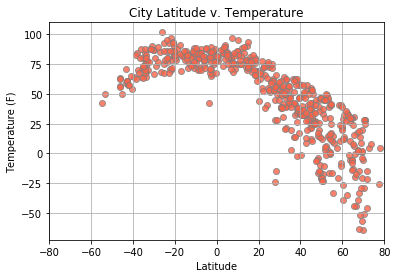

In [52]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], edgecolors="gray", alpha=0.8, c="#FF6347")
plt.title("City Latitude v. Temperature")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-80,80)


plt.savefig('Lat_v_Temp.png')
plt.show()


# Analysis: Temperature

* Temperature was higher for cities near the equator, with similar trends 20 degrees either direction from the equator.
* Citites south of the equator saw high temperatures; cities north of the equator saw temperatures drop the further the city is from the equator.

#### Latitude vs. Humidity Plot

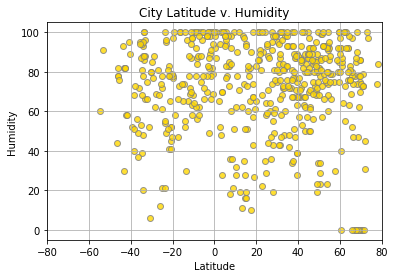

In [71]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"],edgecolors="gray", alpha=0.8, c="#FFD700")
plt.title("City Latitude v. Humidity")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(-5,105)
plt.xlim(-80,80)


plt.savefig('Lat_v_Humidity.png')
plt.show()

# Analysis: Humidity

* Humidity did not have an observable trend in regards to closeness to the equator; cities close to the equator exhibited both high and low levels of humidity.
* Within the given sample of cities, equator cities did exhibit some degree of humidity (<20% humidity)

#### Latitude vs. Cloudiness Plot

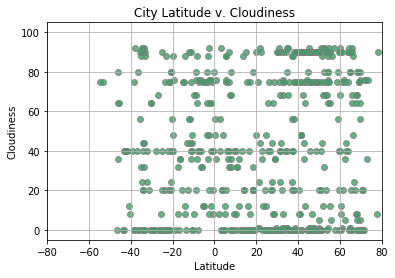

In [56]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"],edgecolors="gray", alpha=0.8, c="#3B9F63")
plt.title("City Latitude v. Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(-5,105)
plt.xlim(-80,80)


plt.savefig('Lat_v_Cloudiness.png')
plt.show()

## Analysis: Cloudiness
* Cloudiness did not have an observable trend in regards to closeness to the equator; cities close to the equator exhibited both high and low levels of cloudiness.
* Within the given sample of cities, several group of  

#### Latitude vs. Wind Speed Plot

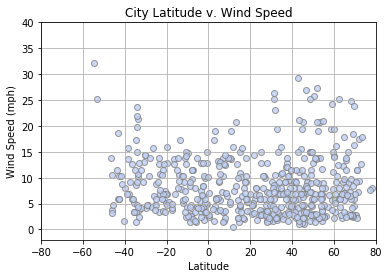

In [62]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"],edgecolors="gray", alpha=0.8, c="#BECFF6")
plt.title("City Latitude v. Wind Speed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,40)
plt.xlim(-80,80)


plt.savefig('Lat_v_Wind Speed.png')
plt.show()